***Tiền xử lý dữ liệu***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (18, 10)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

**Đọc file dữ liệu**

In [3]:
# đọc dữ liệu
data = pd.read_excel("D:\\ML\\bt-hoc-kgs\\svm_data.xlsx")

# in ra 5 dòng đầu tiên của dữ liệu
data.head()

,x1,x2,y
0,0.486861,0.163756,0
1,0.590718,0.429319,0
2,0.537981,0.082374,0
3,0.184411,0.717404,1
4,0.825697,0.414670,1


In [4]:
# tóm tắt thông tin dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   y       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
# kiểm tổng hàng và cột của dữ liệu
data.shape

(100, 3)

In [5]:
# Nội dung của từng cột dữ liệu
data.columns

Index(['x1', 'x2', 'y'], dtype='object')

**Làm sạch dữ liệu**

- Kiểm tra dữ liệu thiếu

In [6]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

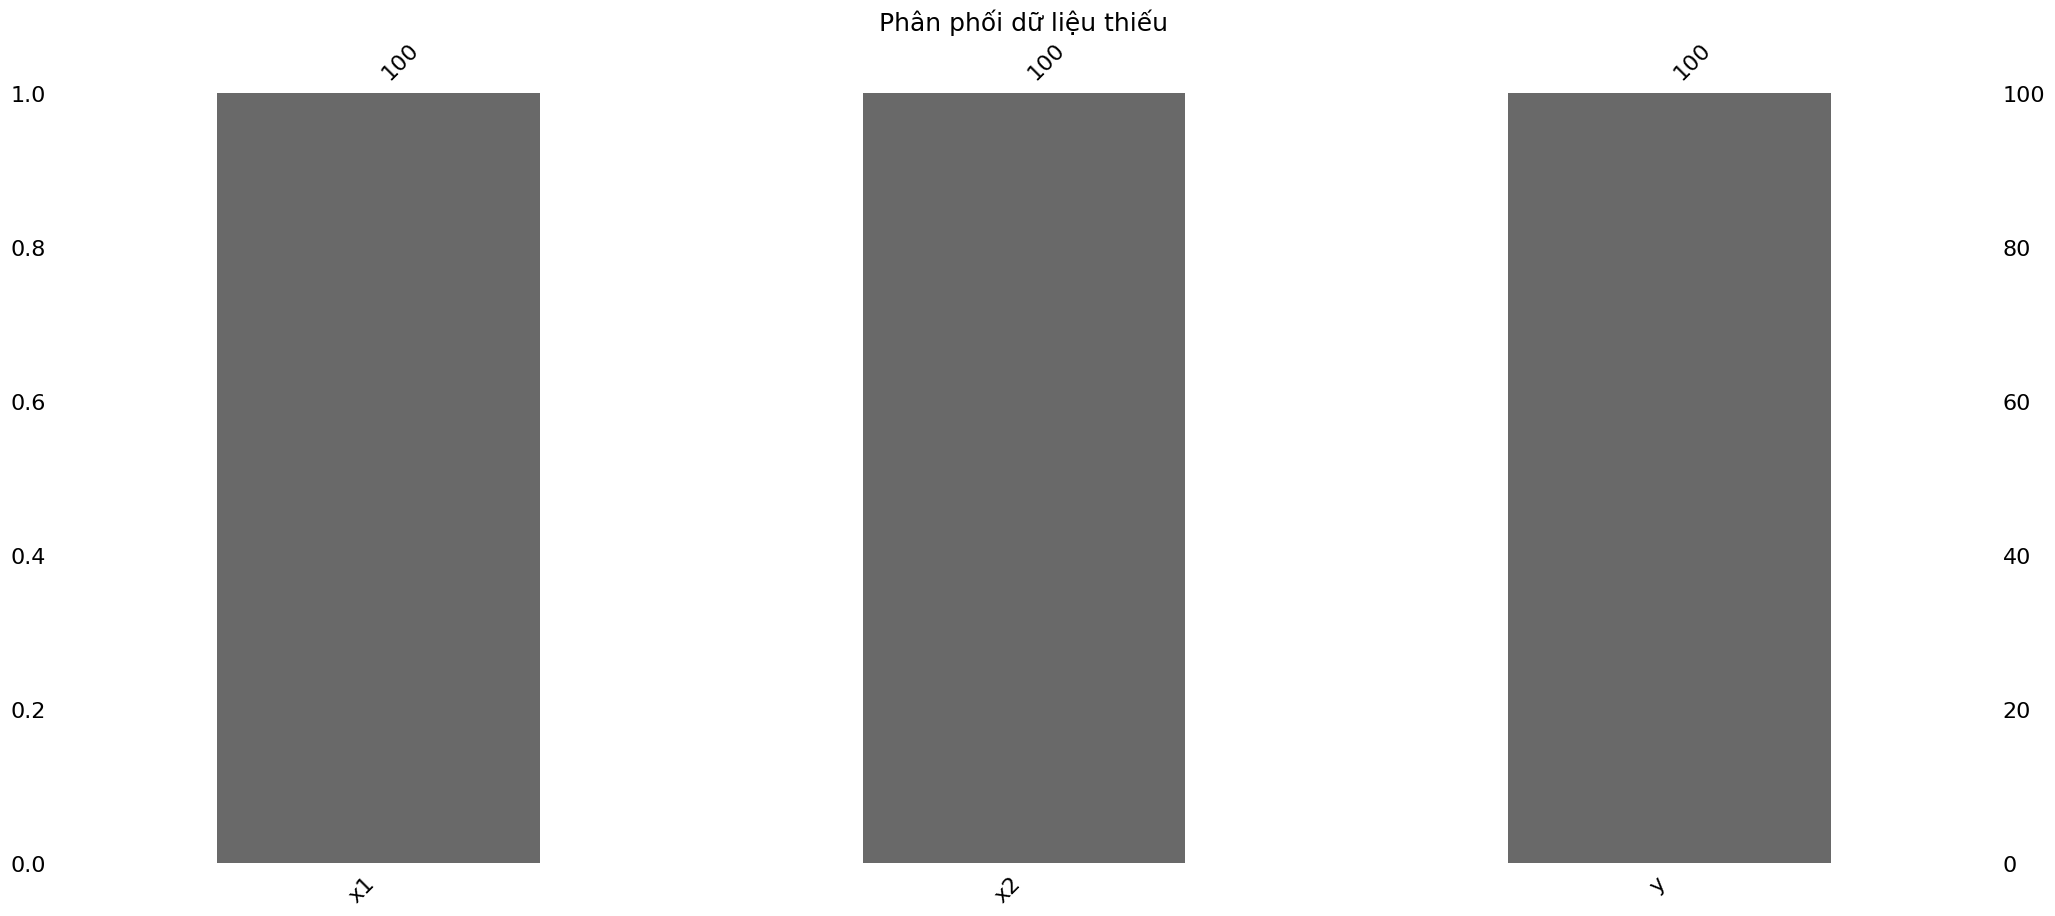

In [8]:
msno.bar(data)
plt.title("Phân phối dữ liệu thiếu", fontsize = 18)
plt.show()

- Kiểm tra dữ liệu lặp

In [7]:
data.duplicated().sum()

0

In [8]:
# Xác định các hàng trùng lặp
duplicated_rows = data.duplicated()

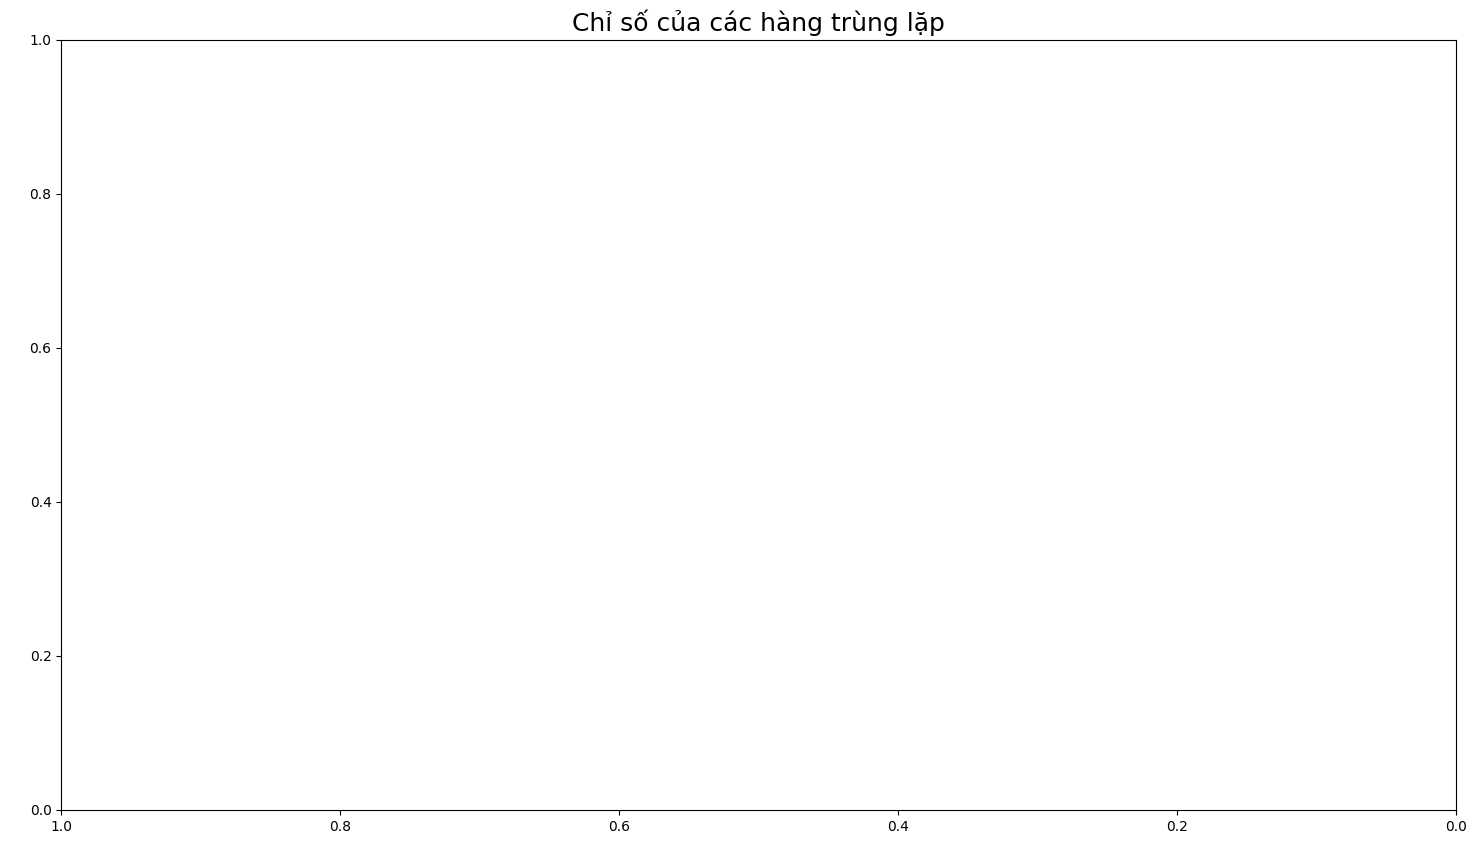

In [9]:
# Tạo một DataFrame mới để lưu số thứ tự của hàng và xác định liệu chúng có bị trùng lặp không
duplicates_data = pd.DataFrame({
    'Row': range(1, len(data) + 1),
    'Duplicated': duplicated_rows
})

# Lọc ra chỉ các hàng đã trùng lặp
duplicates_data = duplicates_data[duplicates_data['Duplicated']]

# Vẽ chúng dưới dạng đường thẳng màu đen
plt.figure(figsize=(18, 10))
plt.vlines(x=duplicates_data['Row'], ymin=0, ymax=1, color='black')
plt.gca().invert_xaxis() # Đảo ngược trục x
plt.title("Chỉ số của các hàng trùng lặp", fontsize = 18)
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

- Xử lý dữ liệu nhiễu

In [10]:
data.describe()

,x1,x2,y
count,100.000000,100.000000,100.00
mean,0.503413,0.534955,0.45
std,0.281093,0.284029,0.50
min,0.009503,0.012806,0.00
25%,0.277163,0.329032,0.00
50%,0.535608,0.544606,0.00
75%,0.716597,0.781614,1.00
max,0.985195,0.998253,1.00


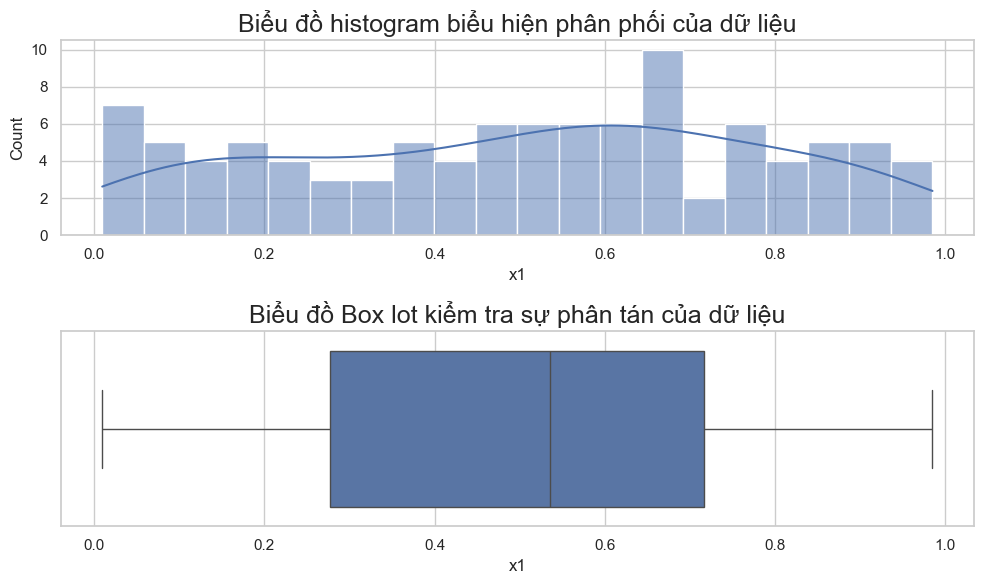

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(2, 1, 1)
sns.histplot(data['x1'], bins=20, kde=True)
plt.title('Biểu đồ histogram biểu hiện phân phối của dữ liệu', fontsize = 18)

# Box plot
plt.subplot(2, 1, 2)
sns.boxplot(x=data['x1'])
plt.title('Biểu đồ Box lot kiểm tra sự phân tán của dữ liệu', fontsize = 18)

plt.tight_layout()
plt.show()

In [21]:
# Hàm xử lý nhiễu bằng phương pháp IQR
def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Áp dụng hàm xử lý nhiễu cho từng cột số
data['x1'] = remove_outliers_iqr(data['x1'])
data['x2'] = remove_outliers_iqr(data['x2'])

# In DataFrame sau khi xử lý nhiễu
data.describe()
print(data.head(10))

         x1        x2  y
0  0.486861  0.163756  0
1  0.590718  0.429319  0
2  0.537981  0.082374  0
3  0.184411  0.717404  1
4  0.825697  0.414670  1
5  0.184482  0.085838  0
6  0.448853  0.605127  0
7  0.549227  0.725299  1
8  0.448738  0.597904  1
9  0.772212  0.718615  0


**Chuyển hóa dữ liệu**

In [22]:
# Tính mean và std của từng cột x1 và x2
mean_x1, std_x1 = data['x1'].mean(), data['x1'].std()
mean_x2, std_x2 = data['x2'].mean(), data['x2'].std()

# Chuẩn hóa Z-score
data['x1_normalized'] = (data['x1'] - mean_x1) / std_x1
data['x2_normalized'] = (data['x2'] - mean_x2) / std_x2

# Hiển thị kết quả
print(data[['x1_normalized', 'x2_normalized', 'y']])

    x1_normalized  x2_normalized  y
0       -0.058883      -1.306909  0
1        0.310591      -0.371920  0
2        0.122977      -1.593436  0
3       -1.134866       0.642359  1
4        1.146540      -0.423499  1
..            ...            ... ..
95      -0.021861      -1.403920  0
96       1.125980      -0.705642  1
97      -0.622688       1.567914  1
98      -1.605768      -0.159576  1
99       1.361313       1.391125  0

[100 rows x 3 columns]


In [24]:
data.to_excel('D:\\ML\\bt-hoc-kgs\\svm-data-da-xu-ly.xlsx', index=True)
